# CS584 MACHINE LEARNING PROJECT
## CRIME PREDICTION

Importing all the necessary packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

Loading the dataset

In [2]:
CummCrime = pd.read_csv('communities-crime-clean.csv')
CummCrime.head()

,state,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,1,Alabastercity,7,0.01,0.61,0.21,0.83,0.02,0.01,0.41,...,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,1,AlexanderCitycity,10,0.01,0.41,0.55,0.57,0.01,0.00,0.47,...,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,1,Annistoncity,3,0.03,0.34,0.86,0.30,0.04,0.01,0.41,...,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,1,Athenscity,8,0.01,0.38,0.35,0.71,0.04,0.01,0.39,...,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,1,Auburncity,1,0.04,0.37,0.32,0.70,0.21,0.02,1.00,...,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


Checking datatype of given columns

In [3]:
CummCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Columns: 104 entries, state to ViolentCrimesPerPop
dtypes: float64(101), int64(2), object(1)
memory usage: 1.6+ MB


Removing non-predictive features

In [4]:
CummCrime = CummCrime.drop(['state','communityname','fold'],axis=1)
CummCrime.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06
1,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,...,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14
2,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,...,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00
3,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,...,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23
4,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,...,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15


In [5]:
CummCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Columns: 101 entries, population to ViolentCrimesPerPop
dtypes: float64(101)
memory usage: 1.5 MB


### Decision Tree
#### 1.a) Create a new field “highCrime” which is true if the crime rate per capita (ViolentCrimesPerPop) is greater than 0.1, and false otherwise. What are the percentage of positive and negative instances in the dataset?

In [6]:
crimeRate = []
for rows in CummCrime['ViolentCrimesPerPop']:
    if rows > 0.1:
        crimeRate.append('True')
    else:
        crimeRate.append('False')
        
CummCrime['highCrime'] = crimeRate
CummCrime.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.00,0.06,False
1,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,...,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.00,0.14,True
2,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,...,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.00,1.00,True
3,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,...,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.00,0.23,True
4,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,...,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.00,0.15,True
5,0.04,0.44,1.00,0.10,0.00,0.00,0.43,0.45,0.30,0.58,...,0.96,0.74,0.95,0.89,0.11,0.07,0.13,0.00,1.00,True
6,0.41,0.37,1.00,0.02,0.03,0.01,0.41,0.50,0.33,0.48,...,0.90,0.64,0.86,0.82,0.43,0.15,0.20,0.38,1.00,True
7,0.01,0.30,0.00,0.99,0.02,0.01,0.38,0.37,0.27,0.74,...,0.82,0.54,0.72,0.76,0.04,0.07,0.01,0.00,0.16,True
8,0.00,0.39,0.31,0.75,0.02,0.02,0.35,0.43,0.22,0.33,...,0.60,0.46,0.40,0.54,0.03,0.08,0.01,0.00,0.05,False
9,0.06,0.39,0.32,0.73,0.04,0.01,0.39,0.46,0.27,0.39,...,0.71,0.47,0.61,0.60,0.14,0.09,0.01,0.00,0.22,True


In [7]:
print("Number of positive and negative instances in the dataset:\n",CummCrime['highCrime'].value_counts())

Number of positive and negative instances in the dataset:
 True     1250
False     743
Name: highCrime, dtype: int64


In [8]:
print("\nPercentage of positive and negative instances in the dataset:\n",CummCrime['highCrime'].value_counts(normalize = True))


Percentage of positive and negative instances in the dataset:
 True     0.627195
False    0.372805
Name: highCrime, dtype: float64


#### Positive: 62.72%
#### Negative: 37.28%

### Use DecisionTreeClassifier to learn a decision tree to predict highCrime on the entire dataset (remember to exclude the crime rate feature from the input feature set so you are not cheating). 
#### i.	What are the training accuracy, precision, and recall for this tree? 
#### ii.	What are the main features used for classification? Can you explain why they make sense (or not)?


Assigning values for training and testing data to predict the final result

In [9]:
x = CummCrime.drop(['ViolentCrimesPerPop','highCrime'],1)
y = CummCrime['highCrime']

x.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.00,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0
1,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,...,0.00,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0
2,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,...,0.02,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0
3,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,...,0.00,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0
4,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,...,0.00,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0


In [10]:
y.head()

0    False
1     True
2     True
3     True
4     True
Name: highCrime, dtype: object

Fitting our data to Descision Tree Classifier

In [11]:
dtree = DecisionTreeClassifier()
dtree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Printing classification report

In [12]:
predictions = dtree.predict(x)
print(classification_report(y,predictions))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00       743
       True       1.00      1.00      1.00      1250

avg / total       1.00      1.00      1.00      1993



### Precision : 1.0
### Recall : 1.0

In [13]:
print("C_Mat:",confusion_matrix(y,predictions))

C_Mat: [[ 743    0]
 [   0 1250]]


In [14]:
print("Accuracy:",accuracy_score(y,predictions))

Accuracy: 1.0


### Main features used for classification:

In [15]:
impFeatures = pd.DataFrame(dtree.feature_importances_ ,index=x.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
impFeatures.head(10)

,Importance
PctKids2Par,0.365528
racePctWhite,0.087891
racePctHisp,0.045120
PctEmplManu,0.021006
PctLess9thGrade,0.018739
MedRent,0.013368
PctEmploy,0.013364
HispPerCap,0.013246
PctPopUnderPov,0.012526
PctLargHouseFam,0.012200


Important Features Summary:

By analyzing our data we can see that the feature with the highest importance is "PctKids2Par" with feature importance 0.37. The 'PctKids2Par' feature has the highest similarity measure while predicting CrimeRate and so on with other features. The decision tree states that the crime rate is high where percent of kids having both parents is low. We can conclude that the single parents might be inclined towards comitting crime to support their children all by him/her self.

The other defining attirbutes also includes percent of different races living in that area and we can also see education(less than 9th grade) of the people is also an important factor. Despite these features which does not make any meaning like amount of people working in manufacturing still we might want to consider the percent of people under and above poverty line because it makes sense.

### c.	Now apply cross-validation (cross_val_score) to do 10-fold cross-validation to estimate the out-of-training accuracy of decision tree learning for this task.
#### i.	What are the 10-fold cross-validation accuracy, precision, and recall?
#### ii.	Why are they different from the results in the previous test?


In [16]:
d = {'True': 1, 'False': 0}
CummCrime['highCrime'] = CummCrime['highCrime'].map(d)

x = CummCrime.drop(['highCrime','ViolentCrimesPerPop'],axis=1)
y = CummCrime['highCrime']
dtree1 = DecisionTreeClassifier()
dtree1.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

##### Printing Accuracy, Precision, Recall

In [17]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(dtree1,x,y,scoring = 'accuracy',cv = 10).mean(), cross_val_score(dtree1,x,y,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(dtree1,x,y,scoring = 'precision',cv = 10).mean(), cross_val_score(dtree1,x,y,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(dtree1,x,y,scoring = 'recall',cv = 10).mean(), cross_val_score(dtree1,x,y,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.74 (+/- 0.09)
Precision: 0.79 (+/- 0.07)
Recall: 0.78 (+/- 0.19)


###  Difference of Accuracy, Percision and Recall from previous test
In the initial decision tree classification, we have seen that the Accuracy, Precision and Recall were 100% as the model built was overfitted to the training set. Once we applied cross validation the data was split into train and test. 
The model was built on splitted data and now the Accuracy, Percision and Recall for the new model went down more than by 20%. The new model is not overfitted towards the training set and thus we can assume that the new model will perform better when encountered with new datapoint as the it is not overfitted.

# 2. Linear Classification
## a). Naive Bayes Classifier
#### i) Naive Bayes Classification with 10 fold Cross Validation

Fitting our dataset to GaussianNB Model

In [18]:
gnb = GaussianNB()
gnb.fit(x,y)

GaussianNB(priors=None)

Printing Accuracy, Precision, Recall

In [19]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(gnb,x,y,scoring = 'accuracy',cv = 10).mean(), cross_val_score(gnb,x,y,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(gnb,x,y,scoring = 'precision',cv = 10).mean(), cross_val_score(gnb,x,y,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(gnb,x,y,scoring = 'recall',cv = 10).mean(), cross_val_score(gnb,x,y,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.76 (+/- 0.11)
Precision: 0.91 (+/- 0.12)
Recall: 0.69 (+/- 0.18)


##### ii) Top 10 Features according to their Predictiveness

In [20]:
feaList = []
for value in x.columns.values:
    trueVal = np.array(CummCrime.loc[CummCrime.highCrime == True, value])
    falseVal = np.array(CummCrime.loc[CummCrime.highCrime == False, value])
    absDiff = abs(trueVal.mean() - falseVal.mean())
    totStd = trueVal.std() + falseVal.std()
    normVal = float('%.4f' % (absDiff/totStd))
    sett = (value, normVal)
    feaList.append(sett)
    
ImpFeatures = pd.DataFrame(feaList, columns=(['Features', 'Norm'])).sort_values("Norm", ascending=False)
ImpFeatures.head(10)
    

,Features,Norm
44,PctKids2Par,0.8097
43,PctFam2Par,0.7455
3,racePctWhite,0.7352
50,PctIlleg,0.7093
40,FemalePctDiv,0.6940
41,TotalPctDiv,0.6746
45,PctYoungKids2Par,0.6650
15,pctWInvInc,0.6611
46,PctTeen2Par,0.6429
38,MalePctDivorce,0.6169


As per the above result,the feature "PctKids2Par" is the most predictive feature. The result makes sense as to derive predictive features is measured by normalised difference of means and hence is directly proportional to difference of mens of features of their respective classes(True or False). Mean reprsent spread of the feature data and more the difference, more is the spread of the feature means the easier to differentiate between the classes.

##### iii) Comparison between the Feature Predictiveness and Important Features from Decision Tree Classification
Form the results of GuassianNB() and DecisionTree Classifier, there are many features differences between "Features with high Predictiveness" and "Features Importance" but there are two common features('PctKids2Par', 'racePctWhite') in the top three features from both lists by which we can assume that these features have a big role in the decision making to predict crime rate because they showed up in both ways of finding important features.

### b). Linear Support Vector Classification model
##### i) Linear Support Vector Classification with 10 fold Cross Validation

Fitting our dataset to LinearSVC Model

In [21]:
lvc = LinearSVC()
lvc.fit(x,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Printing Accuracy, Precision, Recall

In [22]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(lvc,x,y,scoring = 'accuracy',cv = 10).mean(), cross_val_score(lvc,x,y,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(lvc,x,y,scoring = 'precision',cv = 10).mean(), cross_val_score(lvc,x,y,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(lvc,x,y,scoring = 'recall',cv = 10).mean(), cross_val_score(lvc,x,y,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.80 (+/- 0.11)
Precision: 0.85 (+/- 0.10)
Recall: 0.83 (+/- 0.23)


##### 10 most predictive features

In [23]:
impFeatures1 = pd.DataFrame(lvc.coef_[0] ,index=x.columns,columns=['Coef']).sort_values(by='Coef',ascending=False)
impFeatures1.head(10)

,Coef
PersPerOccupHous,1.755126
RentHighQ,1.066885
MalePctDivorce,1.065696
NumUnderPov,1.051549
NumStreet,1.019155
PctOccupMgmtProf,1.014672
population,1.002301
agePct12t21,0.988273
HousVacant,0.936513
agePct65up,0.890573


From the above result,the highest weight corresponds to the attribute “PersPerOccupHous” which speaks us about the number of persons living per household. Number of persons could affect the crime rate in that area.The other attributes such as rental housing, male percent divorces also contribute to the crime rate but there are some attributes with high weights.

From the analysis, the weights of the features can give the importance of the feature in decision making and this is because the coefficients represent the vector orthogonal to the linear hyper plane which separates the data. The higher the coefficient’s absolute value the further it is away from the plane and the further it is away gives more information on classification of the data points. Thus, these weights give us the most predictive features in the dataset.

##### iii) Comparison between the Feature Weights and Important Features from Decision Tree Classification
From the above results, top 10 important features from decision tree classification see that we have some new features which we have high importance like ‘PersPerOccupHous’, ‘pctWInvInc’, ‘NumStreet’, etc.,. These attributes cannot be seen in the decision tree but managed to rack up high weights. We can observe that we have some attributes which are common from both list of features like ‘racePctWhite’ and ‘PctKids2Par’. 

These feature managed to get into the most influencing attributes lists from different classification techniques. These features have a influencing vote on the deciding the classification of a data point.

### 3. Regression
##### a) Linear Regression

In [24]:
x = CummCrime.drop(['ViolentCrimesPerPop','highCrime'],1)
y = CummCrime['ViolentCrimesPerPop']
x.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.00,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0
1,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,...,0.00,0.00,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0
2,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,...,0.02,0.04,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0
3,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,...,0.00,0.03,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0
4,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,...,0.00,0.12,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0


In [25]:
y.head()

0    0.06
1    0.14
2    1.00
3    0.23
4    0.15
Name: ViolentCrimesPerPop, dtype: float64

Fitting our dataset to LinearRegression Model

In [26]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### i) Mean Squared Error with 10 fold Cross Validation

In [27]:
print("Estimated MSE of the model %0.2f (+/- %0.2f)" %(cross_val_score(lm,x,y,scoring = 'neg_mean_squared_error',cv = 10).mean(),(cross_val_score(lm,x,y,scoring = 'neg_mean_squared_error',cv = 10).std()*2)))

Estimated MSE of the model -0.02 (+/- 0.01)


##### ii) Mean Squared Error on training set

In [28]:
predictions = lm.predict(x)
print('MSE of the Training set %0.4f' %(metrics.mean_squared_error(y, predictions)))

MSE of the Training set 0.0165


Plotting Linear Regression graph

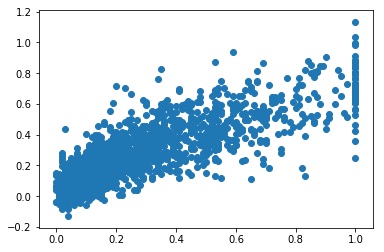

In [29]:
plt.scatter(y,predictions)

Column Names:

In [30]:
x.columns

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecI

##### iii) Features are most predictive of a high crime rate

In [31]:
ImpFeatures2 = pd.DataFrame(lm.coef_,x.columns,columns=['coef']).sort_values(by='coef',ascending=0)
ImpFeatures2.head(10)

,coef
PersPerOccupHous,0.635088
PctHousOwnOcc,0.568133
MalePctDivorce,0.458517
PctRecImmig8,0.432511
MedRent,0.372728
medFamInc,0.287979
PctEmploy,0.248474
MalePctNevMarr,0.226728
PctPersDenseHous,0.214353
OwnOccMedVal,0.212876


##### Features are most predictive of a Low crime rate

In [32]:
ImpFeatures2.tail(10)

,coef
PctRecImmig5,-0.218221
agePct12t29,-0.229218
RentLowQ,-0.234752
PersPerRentOccHous,-0.254572
numbUrban,-0.296443
OwnOccLowQuart,-0.308170
PctKids2Par,-0.322651
whitePerCap,-0.351016
TotalPctDiv,-0.561924
PctPersOwnOccup,-0.675694


### b). RidgeRegression

Fitting our dataset to RidgeCV Model

In [33]:
rcv = RidgeCV(alphas=[10,1,0.1,0.01,0.001])
rcv.fit(x,y)

RidgeCV(alphas=[10, 1, 0.1, 0.01, 0.001], cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

##### i) Mean Squared Error with 10 fold Cross Validation

In [34]:
print("Estimated MSE of the model %0.4f (+/- %0.2f)" %(cross_val_score(rcv,x,y,scoring='neg_mean_squared_error',cv=10).mean(),(cross_val_score(rcv,x,y,scoring='neg_mean_squared_error',cv=10).std()*2)))

Estimated MSE of the model -0.0198 (+/- 0.01)


##### ii) Mean Squared Error on the training set 

In [35]:
predictions1 = rcv.predict(x)

print("MSE of the Training set %0.4f" %(metrics.mean_squared_error(y, predictions1)))

MSE of the Training set 0.0168


##### iii) Best Alpha from [10,1,0.1,0.01,0.001]

In [36]:
print("The best alpha is", rcv.alpha_)

The best alpha is 1.0


##### iv). The amount of overfitting in linear regression
The Mean squared error which was computed in Linear Regression is 0.0165 and Ridge Regression MSE is 0.0168. We observe that the squared error has increase. When a model is overfitted to the training set then the squared error is closer to zero. Now in this scenario, we can see that the MSE for Linear Regression is lower than Ridge thus we can assume that Linear Regression model is more overfitted than the Ridge model for this dataset. More Overfitting means lower bias and higher variance. 

### c). Polynomial Features

In [37]:
poly = PolynomialFeatures(degree=2)
linear_regression = LinearRegression()

ppl = Pipeline([("polynomial_features", poly),
                         ("linear_regression", linear_regression)])
ppl.fit(x,y)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear_regression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

##### i) Mean Squared Error with 10 fold Cross Validation

In [38]:
print("Estimated MSE of the model %0.2f (+/- %0.2f)" %(cross_val_score(ppl,x,y,scoring = 'neg_mean_squared_error',cv = 10).mean(),(cross_val_score(ppl,x,y,scoring = 'neg_mean_squared_error',cv = 10).std()*2)))

Estimated MSE of the model -0.13 (+/- 0.08)


##### ii). The Mean Squared error on the training set 

In [39]:
predictions2 = ppl.predict(x)
print('MSE of the Training set:', metrics.mean_squared_error(y, predictions2))

MSE of the Training set: 1.69580219538e-28


##### ii). The Mean Squared error on the training set 
The Mean Squared Errors for both Polynomial and Linear Regression came out to be the different. We have to observe the fact that the polynomial regression is special case of linear regression and the MSE values decreases and so the overfitting increases.  Quadratic model is not better than linear model.

# 4.Dirty Data

In [40]:
CummCrimeDd = pd.read_csv('communities-crime-full.csv')
CummCrimeDd = CummCrimeDd.drop(['state','communityname','fold'],axis=1)
CummCrimeDd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 125 entries, county to ViolentCrimesPerPop
dtypes: float64(100), object(25)
memory usage: 1.9+ MB


In [41]:
crimeRate1 = []
for rows in CummCrimeDd['ViolentCrimesPerPop']:
    if rows > 0.1:
        crimeRate1.append('True')
    else:
        crimeRate1.append('False')
        
CummCrimeDd['highCrime'] = crimeRate1
CummCrimeDd.head()

,county,community,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,highCrime
0,?,?,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,True
1,?,?,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.12,0.45,?,?,?,?,0.00,?,0.67,True
2,?,?,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.21,0.02,?,?,?,?,0.00,?,0.43,True
3,5,81440,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.39,0.28,?,?,?,?,0.00,?,0.12,True
4,95,6096,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.09,0.02,?,?,?,?,0.00,?,0.03,False


In [42]:
print("Number of positive and negative instances in the dataset:\n",CummCrimeDd['highCrime'].value_counts())

Number of positive and negative instances in the dataset:
 True     1251
False     743
Name: highCrime, dtype: int64


In [43]:
print("Percentage of positive and negative instances in the dataset:\n",CummCrimeDd['highCrime'].value_counts(normalize = True))

Percentage of positive and negative instances in the dataset:
 True     0.627382
False    0.372618
Name: highCrime, dtype: float64


Replacing "?" with NaN values

In [44]:
CummCrimeDd.replace('?',np.nan,inplace=True)
CummCrimeDd.head()

,county,community,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,highCrime
0,NaN,NaN,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20,True
1,NaN,NaN,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67,True
2,NaN,NaN,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43,True
3,5,81440,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12,True
4,95,6096,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03,False


Checking missing values

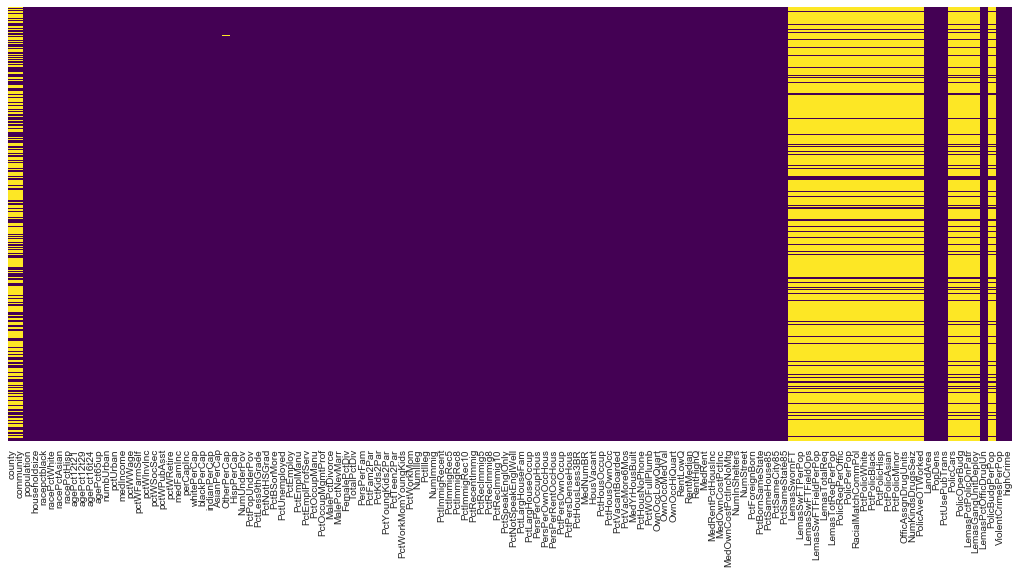

In [45]:
import seaborn as sns

plt.figure(figsize=(18, 8))
sns.heatmap(CummCrimeDd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Deleting column with maximum number of Null values

In [46]:
CummCrimeDd = CummCrimeDd.dropna(axis=1,thresh = 1000)
CummCrimeDd.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20,True
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67,True
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43,True
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12,True
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03,False


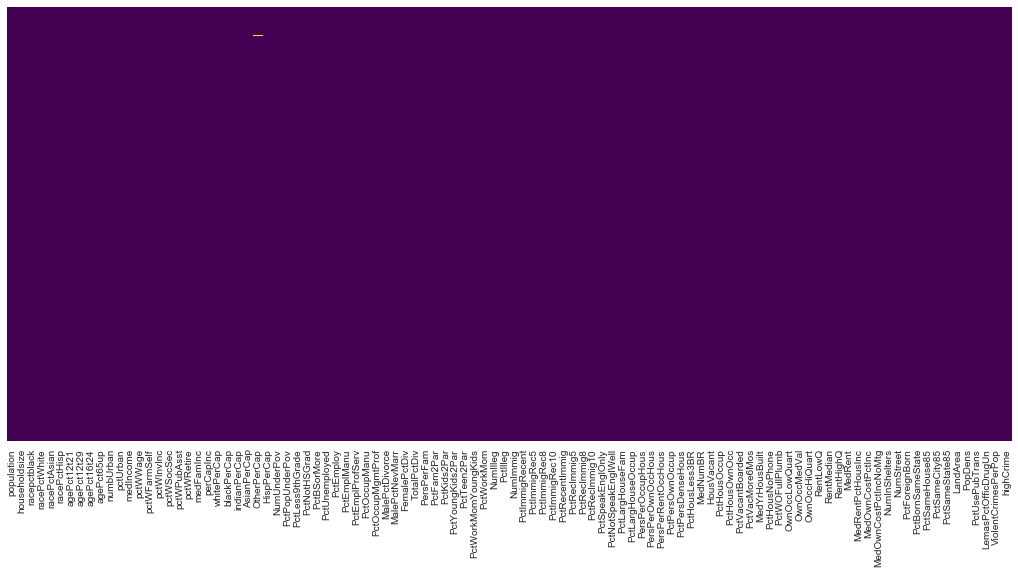

In [47]:
plt.figure(figsize=(18, 8))
sns.heatmap(CummCrimeDd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Imputing mean in place of single missing values

In [48]:
print("Total number of missing values:",sum(CummCrimeDd.isnull().any()))
CummCrimeDd.isnull().any()

Total number of missing values: 1


population               False
householdsize            False
racepctblack             False
racePctWhite             False
racePctAsian             False
racePctHisp              False
agePct12t21              False
agePct12t29              False
agePct16t24              False
agePct65up               False
numbUrban                False
pctUrban                 False
medIncome                False
pctWWage                 False
pctWFarmSelf             False
pctWInvInc               False
pctWSocSec               False
pctWPubAsst              False
pctWRetire               False
medFamInc                False
perCapInc                False
whitePerCap              False
blackPerCap              False
indianPerCap             False
AsianPerCap              False
OtherPerCap               True
HispPerCap               False
NumUnderPov              False
PctPopUnderPov           False
PctLess9thGrade          False
                         ...  
PctHousOccup             False
PctHousO

In [49]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
CummCrimeDd["OtherPerCap"] = imp.fit_transform(CummCrimeDd[["OtherPerCap"]]).ravel()

In [50]:
sum(CummCrimeDd.isnull().any())

0

In [51]:
dtree1 = DecisionTreeClassifier()
x = CummCrimeDd.drop(['highCrime','ViolentCrimesPerPop'],axis=1)
y = CummCrimeDd['highCrime']

dtree1.fit(x,y)
predictions2 = dtree1.predict(x)

In [52]:
print(classification_report(y,predictions2))

             precision    recall  f1-score   support

      False       1.00      1.00      1.00       743
       True       1.00      1.00      1.00      1251

avg / total       1.00      1.00      1.00      1994



In [53]:
print(confusion_matrix(y,predictions2))

[[ 743    0]
 [   0 1251]]


In [54]:
print(accuracy_score(y,predictions2))

1.0


In [55]:
impFeatures4 = pd.DataFrame(dtree1.feature_importances_ ,index=x.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
impFeatures4.head(10)

,Importance
PctKids2Par,0.358796
racePctWhite,0.088836
racePctHisp,0.045107
PctEmplManu,0.021310
PctLess9thGrade,0.018734
PctImmigRec10,0.013921
HispPerCap,0.013720
MedRent,0.013364
PctWOFullPlumb,0.013072
PctPopUnderPov,0.012522


In [56]:
d = {'True': 1, 'False': 0}
CummCrimeDd['highCrime'] = CummCrimeDd['highCrime'].map(d)

x = CummCrimeDd.drop(['highCrime','ViolentCrimesPerPop'],axis=1)
y = CummCrimeDd['highCrime']
dtree1 = DecisionTreeClassifier()
dtree1.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [57]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(dtree1,x,y,scoring = 'accuracy',cv = 10).mean(), cross_val_score(dtree1,x,y,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(dtree1,x,y,scoring = 'precision',cv = 10).mean(), cross_val_score(dtree1,x,y,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(dtree1,x,y,scoring = 'recall',cv = 10).mean(), cross_val_score(dtree1,x,y,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.76 (+/- 0.05)
Precision: 0.81 (+/- 0.06)
Recall: 0.79 (+/- 0.09)


##### a).Are the CV results better or worse?
On comparison of Accuracy, Precision and Recall of the clean dataset and the scores from above dirty dataset, The Scores have improved. The reason is when handling the missing data by removing the columns which has more than 1000 missing values, we used imputing to fill out the missing values and we have more information(few) to classify the tree unlike the clean dataset where eliminated the missing values. Thus we have obtained better Accuracy, Precision and Recall scores.

# Extra Credit

### 6)a.Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

CummCrime = pd.read_csv('communitiescrimeclean.csv')
CummCrime = CummCrime.drop(['state','communityname','fold'],axis=1)

crimeRate = []
for rows in CummCrime['ViolentCrimesPerPop']:
    if rows > 0.1:
        crimeRate.append(1)
    else:
        crimeRate.append(0)
        
CummCrime['highCrime'] = crimeRate
CummCrime.head()


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop,highCrime
0,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06,0
1,0.01,0.41,0.55,0.57,0.01,0.00,0.47,0.45,0.31,0.57,...,0.93,0.66,0.82,0.84,0.11,0.03,0.01,0.0,0.14,1
2,0.03,0.34,0.86,0.30,0.04,0.01,0.41,0.42,0.27,0.59,...,0.77,0.59,0.70,0.64,0.06,0.11,0.04,0.0,1.00,1
3,0.01,0.38,0.35,0.71,0.04,0.01,0.39,0.46,0.31,0.49,...,0.78,0.56,0.67,0.71,0.09,0.05,0.00,0.0,0.23,1
4,0.04,0.37,0.32,0.70,0.21,0.02,1.00,1.00,1.00,0.14,...,0.49,0.12,0.00,0.15,0.09,0.09,0.01,0.0,0.15,1


#### Clean Data

In [59]:
x = CummCrime.drop(['highCrime','ViolentCrimesPerPop'],axis=1)
y = CummCrime['highCrime']
logmodel = LogisticRegression()
logmodel.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(logmodel,x,y,scoring = 'accuracy',cv = 10).mean(), cross_val_score(logmodel,x,y,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(logmodel,x,y,scoring = 'precision',cv = 10).mean(), cross_val_score(logmodel,x,y,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(logmodel,x,y,scoring = 'recall',cv = 10).mean(), cross_val_score(logmodel,x,y,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.81 (+/- 0.11)
Precision: 0.85 (+/- 0.10)
Recall: 0.84 (+/- 0.23)


In [61]:
ImpFeatures5 = pd.DataFrame(logmodel.coef_[0],x.columns,columns=['coef']).sort_values(by='coef',ascending=0)
ImpFeatures5.head(10)

,coef
racepctblack,2.405087
MalePctDivorce,1.405005
racePctHisp,1.348499
PctPersDenseHous,1.308388
PctIlleg,1.089460
TotalPctDiv,1.088767
HousVacant,1.072005
RentHighQ,1.003271
OtherPerCap,0.956995
MedRentPctHousInc,0.873664


#### Full Data

In [62]:
x1 = CummCrimeDd.drop(['highCrime','ViolentCrimesPerPop'],axis=1)
y1 = CummCrimeDd['highCrime']
logmodel1 = LogisticRegression()
logmodel1.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(logmodel1,x1,y1,scoring = 'accuracy',cv = 10).mean(), cross_val_score(logmodel1,x1,y1,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(logmodel1,x1,y1,scoring = 'precision',cv = 10).mean(), cross_val_score(logmodel1,x1,y1,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(logmodel1,x1,y1,scoring = 'recall',cv = 10).mean(), cross_val_score(logmodel1,x1,y1,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.84 (+/- 0.03)
Precision: 0.87 (+/- 0.04)
Recall: 0.87 (+/- 0.04)


In [64]:
ImpFeatures6 = pd.DataFrame(logmodel1.coef_[0],x1.columns,columns=['coef']).sort_values(by='coef',ascending=0)
ImpFeatures6.head(10)

,coef
racepctblack,2.405087
MalePctDivorce,1.405005
racePctHisp,1.348499
PctPersDenseHous,1.308388
PctIlleg,1.089460
TotalPctDiv,1.088767
HousVacant,1.072005
RentHighQ,1.003271
OtherPerCap,0.956995
MedRentPctHousInc,0.873664


### Non linear kernal

In [65]:
from sklearn.svm import SVC

nlSVC = SVC(kernel='poly',degree=2)
nlSVC.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(nlSVC,x,y,scoring = 'accuracy',cv = 10).mean(), cross_val_score(nlSVC,x,y,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(nlSVC,x,y,scoring = 'precision',cv = 10).mean(), cross_val_score(nlSVC,x,y,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(nlSVC,x,y,scoring = 'recall',cv = 10).mean(), cross_val_score(nlSVC,x,y,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.78 (+/- 0.10)
Precision: 0.79 (+/- 0.11)
Recall: 0.90 (+/- 0.15)


#### Full data

In [68]:
nlSVC1 = SVC(kernel='poly',degree=2)
nlSVC1.fit(x1,y1)
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(nlSVC1,x1,y1,scoring = 'accuracy',cv = 10).mean(), cross_val_score(nlSVC1,x1,y1,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(nlSVC1,x1,y1,scoring = 'precision',cv = 10).mean(), cross_val_score(nlSVC1,x1,y1,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(nlSVC1,x1,y1,scoring = 'recall',cv = 10).mean(), cross_val_score(nlSVC1,x1,y1,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.80 (+/- 0.03)
Precision: 0.79 (+/- 0.04)
Recall: 0.92 (+/- 0.03)


#### ii) What method gives the best results?
Logistic Regression is better than Non-Linear Kernel for SVM. as the accuracy, precision and score is better than previous.

 ### 6)b.Random Forests

In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [71]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(rfc,x,y,scoring = 'accuracy',cv = 10).mean(), cross_val_score(rfc,x,y,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(rfc,x,y,scoring = 'precision',cv = 10).mean(), cross_val_score(rfc,x,y,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(rfc,x,y,scoring = 'recall',cv = 10).mean(), cross_val_score(rfc,x,y,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.81 (+/- 0.09)
Precision: 0.85 (+/- 0.09)
Recall: 0.84 (+/- 0.21)


In [72]:
impFeatures8 = pd.DataFrame(rfc.feature_importances_ ,index=x.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
impFeatures8.head(10)

,Importance
racePctWhite,0.054189
PctKids2Par,0.051488
PctIlleg,0.050410
FemalePctDiv,0.040557
PctFam2Par,0.036064
TotalPctDiv,0.035593
NumIlleg,0.029730
NumUnderPov,0.027295
PctTeen2Par,0.025419
MalePctDivorce,0.024135


### SVC with RBF Kernel

In [74]:
from sklearn.svm import SVC
rsvc = SVC(kernel='rbf',gamma=0.6)
rsvc.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.6, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cross_val_score(rsvc,x,y,scoring = 'accuracy',cv = 10).mean(), cross_val_score(rsvc,x,y,scoring = 'accuracy',cv = 10).std() * 2))
print("Precision: %0.2f (+/- %0.2f)" % (cross_val_score(rsvc,x,y,scoring = 'precision',cv = 10).mean(), cross_val_score(rsvc,x,y,scoring = 'precision',cv = 10).std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (cross_val_score(rsvc,x,y,scoring = 'recall',cv = 10).mean(), cross_val_score(rsvc,x,y,scoring = 'recall',cv = 10).std() * 2))

Accuracy: 0.77 (+/- 0.11)
Precision: 0.82 (+/- 0.12)
Recall: 0.83 (+/- 0.23)


#### ii) What method gives the best results?

SVC with RBF kernel is better than Random Forest Classifications. as the accuracy, precision and score is better than previous.